In [13]:
import os

import cv2
import matplotlib.pyplot as plt

In [6]:
# Read the image in a grayscale mode
img_path = r'C:\Users\zliu1997\Desktop\final_project\results\coherence_1002_1014_2021.tif'
image = cv2.imread(img_path)

# # Apply GaussianBlur to reduce image noise if it is required
# if is_reduce_noise:
#    image = cv2.GaussianBlur(image, (5, 5), 0)

In [7]:
print(image)

None


In [2]:
import gdal
import numpy as np
from skimage import data
from skimage.filters import threshold_multiotsu
def output_same(data, template_file_name, output_name, data_type=None):
    """
This function is to output a raster using a template so that users don't need to define the driver of gdal.
    :param data: the raster data you want to save, it should be numpy array. It should be channel first
    :param template_file_name:
    :param output_name:
    :param data_type:
    """
    gtif = gdal.Open(template_file_name)
    ## get the first band in the file
    band = gtif.GetRasterBand(1)
    if (data_type == None):
        data_type = band.DataType
    if (len(data.shape) == 2):
        data = np.expand_dims(data, axis=0)
    ## get the rows and cols of the input file
    rows = gtif.RasterYSize
    cols = gtif.RasterXSize
    output_format = output_name.split('.')[-1].upper()
    if (output_format == 'TIF'):
        output_format = 'GTIFF'
    elif (output_format == 'RST'):
        output_format = 'rst'
    driver = gdal.GetDriverByName(output_format)
    outDs = driver.Create(output_name, cols, rows, len(data), data_type)
    for i in range(len(data)):
        outBand = outDs.GetRasterBand(i + 1)
        outBand.WriteArray(data[i])
    # georeference the image and set the projection
    outDs.SetGeoTransform(gtif.GetGeoTransform())
    outDs.SetProjection(gtif.GetProjection())
    outDs.FlushCache()
    ## need to release the driver
    del outDs
    return output_name

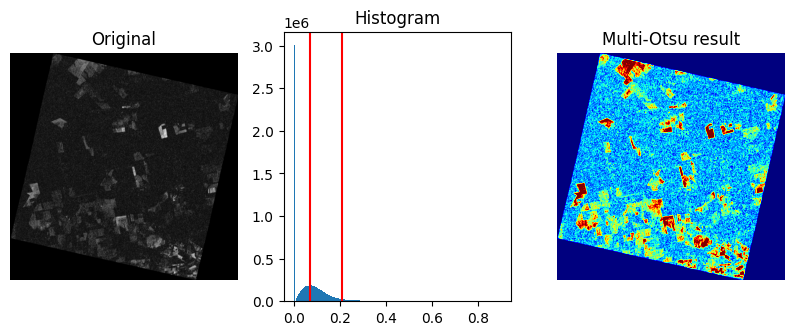

In [143]:
file_path = r'C:\Users\zliu1997\Desktop\final_project\results\coherance_1021_1102_original.tif'
ds = gdal.Open(file_path)
array = ds.GetRasterBand(1).ReadAsArray()
# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(array,3)

# Using the threshold values, we generate the three regions.
regions = np.digitize(array, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(array, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(array.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()


In [144]:
output_same(regions>1,file_path,file_path.replace('.tif','_otsu_threshold.tif'),gdal.GDT_Byte)

'C:\\Users\\zliu1997\\Desktop\\final_project\\results\\coherance_1021_1102_original_otsu_threshold.tif'

In [168]:
import os
result_folder = r"C:\Users\zliu1997\Desktop\final_project\results"
for i in os.listdir(result_folder):
    if(i.endswith('threshold.tif')):
        sample_raster = os.path.join(result_folder,i)
        # Filename of the raster Tiff that will be created
        output_raster = os.path.join(result_folder,i.replace('.tif','_sieve.tif'))
        ds = gdal.Open(sample_raster)
        src_band = ds.GetRasterBand(1)
        drv = gdal.GetDriverByName("GTiff")
        dst_ds = drv.Create(output_raster,ds.RasterXSize , ds.RasterYSize, 1, gdal.GDT_Byte)
        dst_band = dst_ds.GetRasterBand(1)
        gdal.SieveFilter(src_band,None,dst_band,10,8)
        output_same(dst_band.ReadAsArray(),sample_raster,output_raster,gdal.GDT_Byte)
        print(i,'is finished')


coherance_0506_0518_original_otsu_threshold.tif is finished
coherance_0611_0623_original_otsu_threshold.tif is finished
coherance_0623_0705_original_otsu_threshold.tif is finished
coherance_0705_0717_original_otsu_threshold.tif is finished
coherance_0717_0729_original_otsu_threshold.tif is finished
coherance_0729_0810_original_otsu_threshold.tif is finished
coherance_0810_0822_original_otsu_threshold.tif is finished
coherance_0822_0903_original_otsu_threshold.tif is finished
coherance_0903_0915_original_otsu_threshold.tif is finished
coherance_0915_0927_original_otsu_threshold.tif is finished
coherance_0927_1009_original_otsu_threshold.tif is finished
coherance_1009_1021_original_otsu_threshold.tif is finished
coherance_1021_1102_original_otsu_threshold.tif is finished
coherence_0511_0523_2021_otsu_threshold.tif is finished
coherence_0518_0530_original_otsu_threshold.tif is finished
coherence_0523_0604_2021_otsu_threshold.tif is finished
coherence_0530_0611_original_otsu_threshold.tif 

In [4]:
# Filename of the raster Tiff that will be created
sample_raster = r"C:\Users\zliu1997\Desktop\final_project\results\new_deforest.tif"
# Filename of the raster Tiff that will be created
output_raster = r"C:\Users\zliu1997\Desktop\final_project\results\new_deforest_sieve.tif"
ds = gdal.Open(sample_raster)
src_band = ds.GetRasterBand(1)
drv = gdal.GetDriverByName("GTiff")
dst_ds = drv.Create(output_raster,ds.RasterXSize , ds.RasterYSize, 1, gdal.GDT_Byte)
dst_band = dst_ds.GetRasterBand(1)
gdal.SieveFilter(src_band,None,dst_band,100,8)
output_same(dst_band.ReadAsArray(),sample_raster,output_raster,gdal.GDT_Byte)

'C:\\Users\\zliu1997\\Desktop\\final_project\\results\\new_deforest_sieve.tif'

In [182]:
output_res = np.zeros((3142,3156))
for i in os.listdir(result_folder):
    if(i.endswith('original_otsu_threshold_sieve.tif')):
        sample_raster = os.path.join(result_folder,i)
        ds = gdal.Open(sample_raster)
        src_band = ds.GetRasterBand(1).ReadAsArray()
        output_res = output_res+src_band[:3142,:3156]
        print(src_band[:3142,:3156])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

In [183]:
output_same(output_res>0,sample_raster,r"C:\Users\zliu1997\Desktop\final_project\results\coherance_2022.tif",gdal.GDT_Byte)

'C:\\Users\\zliu1997\\Desktop\\final_project\\results\\coherance_2022.tif'

In [164]:
output_same(dst_band.ReadAsArray(),sample_raster,output_raster,gdal.GDT_Byte)

'C:\\Users\\zliu1997\\Desktop\\final_project\\results\\coherance_0506_0518_original_otsu_threshold_sieve.tif'

In [153]:
ds.RasterXSize

3156

In [156]:
from osgeo import gdal, ogr




drv = gdal.GetDriverByName("GTiff")
# Define pixel_size and NoData value of new raster
pixelSizeX = drv.rasterUnitsPerPixelX()
pixelSizeY = drv.rasterUnitsPerPixelY()
NoData_value = -9999

# Open the data source and read in the extent
source_ds = ogr.Open(sample_raster)
source_layer = source_ds.GetLayer()
x_min, x_max, y_min, y_max = source_layer.GetExtent()

# Create the destination data source
x_res = int((x_max - x_min) / pixelSizeX)
y_res = int((y_max - y_min) / pixelSizeY)
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster, x_res, y_res, 1, gdal.GDT_Byte)
target_ds.SetGeoTransform((x_min, pixelSizeX, 0, y_max, 0, -pixelSizeY))
band = target_ds.GetRasterBand(1)
band.SetNoDataValue(NoData_value)

# Rasterize
gdal.RasterizeLayer(output_raster, [1], source_layer, burn_values=[0])

AttributeError: 'Driver' object has no attribute 'rasterUnitsPerPixelX'

In [186]:
ds_fr = gdal.Open(r'C:\Users\zliu1997\Desktop\final_project\results\coherence_1014_1026_2021.tif')
frame_array = ds_fr.GetRasterBand(1).ReadAsArray()>0
output_same(frame_array,sample_raster,r"C:\Users\zliu1997\Desktop\final_project\results\raster_frame.tif",gdal.GDT_Byte)

'C:\\Users\\zliu1997\\Desktop\\final_project\\results\\raster_frame.tif'